In [2]:
%matplotlib inline
import plotting_Boyle as plt_B
reload(plt_B)
import matplotlib.pylab as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set_style('ticks');
current_colors = sns.color_palette()
sns.set_palette('Accent');
import sys 
sys.path.append('../code_general/')
from read_model_ID import unpack_parameters
import CRISPR_free_energy_landscape as FreeEnergy
reload(FreeEnergy);
import plotting_Boyle as plt_B
reload(plt_B)
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);

import analysis_SA_fits as SAfits
reload(SAfits);

import Boyle_data_processing as Bdata
reload(Bdata);

import read_model_ID;
reload(read_model_ID);

import Weighted_Average as WA
reload(WA)

import coarsegrained_Model as cg
reload(cg)

from copy import copy

data_folder = '../data/22_3_2019/'

In [3]:
def transform_parameters(parameters,alpha,
                         model_id='general_energies_no_kPR', 
                         barr_1_start=1,
                         barr_1_end=10,
                         barr_2_start = 13,
                         barr_2_end = 17,
                         Plot=True):
    
    new_parameters = parameters.copy()
    
    if model_id=='general_energies_no_kPR':
        new_parameters[-1] = parameters[-1]+np.log10(alpha)
        new_parameters[barr_1_start]= parameters[barr_1_start]-np.log(alpha)
        new_parameters[barr_1_end] = parameters[barr_1_end]+np.log(alpha)
        new_parameters[barr_2_start]= parameters[barr_2_start]-np.log(alpha)
        new_parameters[barr_2_end] = parameters[barr_2_end]+np.log(alpha)
        
        _, Model_1_mat, _ = plt_B.calc_predictions(parameters,model_id)
        _, Model_2_mat, _ = plt_B.calc_predictions(new_parameters,model_id)
        
        if Plot:
            new_Energy_landscape, _ = FreeEnergy.plot_free_energy_landscape(new_parameters,model_id, show_plot=False)              
            Energy_landscape, _ = FreeEnergy.plot_free_energy_landscape(parameters,model_id, show_plot=False)
            plt.figure()
            plt.plot(range(-1,21),Energy_landscape, marker='s', label = 'Model 1');
            plt.plot(range(-1,21),new_Energy_landscape, marker='s', label = 'Model 2');
            plt.xlabel('targeting progression', fontsize=15)
            plt.ylabel(r'(approx.) free-energy ($k_BT$)',fontsize=15)
            plt.xticks(range(-1,21),
                       [ 'S','P',1,'', '', '', 5, '', '', '', '', 10, '', '', '', '', 15, '', '', '', '', 20], rotation=0
                       ,fontsize=15);
            plt.yticks(fontsize=15)
            plt.grid('on')
            plt.legend(fontsize=15)
            sns.despine()
            
            plt.figure()
            _,_ = plt_B.plot_heatmap(Model_2_mat ,kind='OnRate')
            
            plt.figure()
            _,_ = plt_B.plot_single_mismatches(Model_2_mat ,kind='OnRate')
            
        corr, score = cg.Model_Model_correlation(Model_1_mat, Model_2_mat, Plot=Plot)
    
    return new_parameters, corr, score

In [4]:
simset = []
chi_squared = [] 

#---------- collect simulations ---------------
for sim in range(1,101):
    sa = pd.read_csv(data_folder + 'fit_22_3_2019_sim_' +str(sim)+'.txt', delimiter='\t', index_col=45)
    filename = data_folder + 'fit_22_3_2019_sim_' +str(sim) +'.txt'   
    chi_squared.append(sa.Potential.iloc[-1])
    simset.append(filename)
    

    
    
best_fit = simset[np.argmin(chi_squared)]
best_fit

'../data/22_3_2019/fit_22_3_2019_sim_13.txt'

score:
0.0268585353171


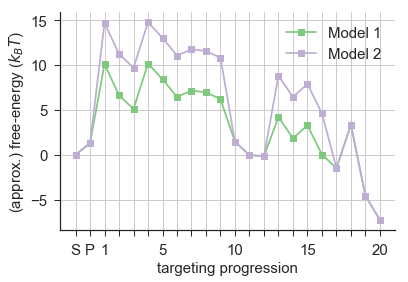

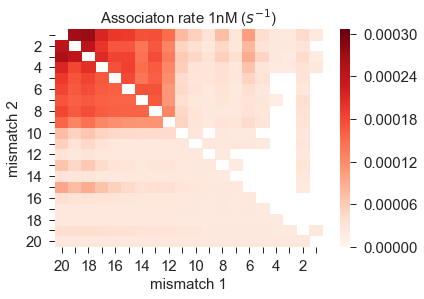

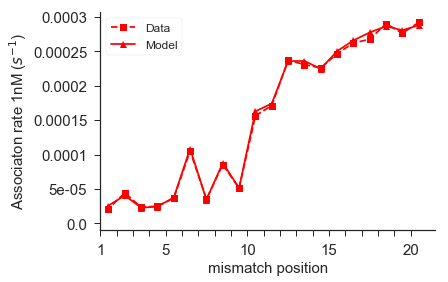

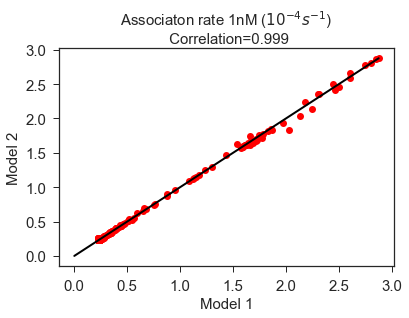

In [5]:
model_id = 'general_energies_no_kPR'
#filename = simset[np.argsort(chi_squared)[3]]
filename = best_fit
Nparams = 43
parameters = plt_B.load_simm_anneal(filename, Nparams)

alpha = 100

new_parameters, corr, score = transform_parameters(parameters,alpha,Plot=True)
print 'score:'
print score